In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.pandas.set_option('display.max_columns',None)

In [86]:
train_data=pd.read_csv('C:/Users/user/Desktop/pythonfiles/new_train_data2.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

In [87]:
test_data=pd.read_csv('C:/Users/user/Desktop/pythonfiles/new_test_data2.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non

In [88]:
continuous_var=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

 # list of continuous variables without SalePrice

In [89]:
data=train_data.drop(['Id','SalePrice'],axis=1)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,rareval,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal


In [90]:
data1=test_data.drop(['Id'],axis=1)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,Rare_val,80.0,11622,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,missing,MnPrv,missing,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,missing,missing,Rare_val,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,missing,MnPrv,missing,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,missing,missing,missing,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,missing,missing,missing,0,1,2010,WD,Normal


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
scaler=StandardScaler()
data[continuous_var]=scaler.fit_transform(data[continuous_var])
data1[continuous_var]=scaler.transform(data1[continuous_var])  

# Note how the conversion of 'data' using a function which fits (figures out the params) then normalises. Whilst the data1 conversion just transforms, using the same params that it learned from the train data(data).

In [93]:
data.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,-0.220875,-0.207142,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.514104,Gd,TA,PConc,Gd,TA,No,GLQ,0.575425,Unf,-0.288653,-0.944591,-0.459303,GasA,Ex,Y,SBrkr,-0.793434,1.161852,0,0.370333,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,0.351000,TA,TA,Y,-0.752176,0.216503,-0.359325,0,-0.270208,0,Missing,Missing,Missing,0,2,2008,WD,Normal
1,20,RL,0.460320,-0.091886,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,rareval,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,-0.570750,TA,TA,CBlock,Gd,TA,Gd,ALQ,1.171992,Unf,-0.288653,-0.641228,0.466465,GasA,Ex,Y,SBrkr,0.257140,-0.795163,0,-0.482512,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,-0.060731,TA,TA,Y,1.626195,-0.704483,-0.359325,0,-0.270208,0,Missing,Missing,Missing,0,5,2007,WD,Normal
2,60,RL,-0.084636,0.073480,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.325915,Gd,TA,PConc,Gd,TA,Mn,GLQ,0.092907,Unf,-0.288653,-0.301643,-0.313369,GasA,Ex,Y,SBrkr,-0.627826,1.189351,0,0.515013,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,0.631726,TA,TA,Y,-0.752176,-0.070361,-0.359325,0,-0.270208,0,Missing,Missing,Missing,0,9,2008,WD,Normal
3,70,RL,-0.447940,-0.096897,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.570750,TA,TA,BrkTil,TA,Gd,No,ALQ,-0.499274,Unf,-0.288653,-0.061670,-0.687324,GasA,Gd,Y,SBrkr,-0.521734,0.937276,0,0.383659,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,0.790804,TA,TA,Y,-0.752176,-0.176048,4.092524,0,-0.270208,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml
4,60,RL,0.641972,0.375148,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.366489,Gd,TA,PConc,Gd,TA,Av,GLQ,0.463568,Unf,-0.288653,-0.174865,0.199680,GasA,Ex,Y,SBrkr,-0.045611,1.617877,0,1.299326,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,1.698485,TA,TA,Y,0.780197,0.563760,-0.359325,0,-0.270208,0,Missing,Missing,Missing,0,12,2008,WD,Normal


In [94]:
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,Rare_val,0.460320,0.110763,Pave,missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,-0.570750,TA,TA,CBlock,TA,TA,No,Rec,0.053428,LwQ,0.604293,-0.672923,-0.400017,GasA,TA,Y,SBrkr,-0.689929,-0.795163,0,-1.179256,0.0,0.0,1,0,2,1,TA,5,Typ,0,missing,Attchd,49.0,Unf,1.0,1.202536,TA,TA,Y,0.365179,-0.704483,-0.359325,0,1.882709,0,missing,MnPrv,missing,0,6,2010,WD,Normal
1,20,RL,0.505733,0.375850,Pave,missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,0.027027,TA,TA,CBlock,TA,TA,No,ALQ,1.051363,Unf,-0.288653,-0.365032,0.619239,GasA,TA,Y,SBrkr,0.430511,-0.795163,0,-0.354966,0.0,0.0,1,1,3,1,Gd,6,Typ,0,missing,Attchd,52.0,Unf,1.0,-0.753188,TA,TA,Y,2.384400,-0.160950,-0.359325,0,-0.270208,0,missing,missing,Rare_val,12500,6,2010,WD,Normal
2,60,RL,0.187842,0.332053,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,-0.570750,TA,TA,PConc,Gd,TA,No,GLQ,0.761852,Unf,-0.288653,-0.974021,-0.295127,GasA,Gd,Y,SBrkr,-0.607125,0.811239,0,0.216136,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,0.042202,TA,TA,Y,0.939819,-0.191147,-0.359325,0,-0.270208,0,missing,MnPrv,missing,0,3,2010,WD,Normal
3,60,RL,0.369494,-0.054002,Pave,missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,-0.460051,TA,TA,PConc,TA,TA,No,GLQ,0.347326,Unf,-0.288653,-0.550672,-0.299687,GasA,Ex,Y,SBrkr,-0.612300,0.758532,0,0.168544,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,-0.013943,TA,TA,Y,2.121024,-0.160950,-0.359325,0,-0.270208,0,missing,missing,missing,0,6,2010,WD,Normal
4,120,RL,-1.219961,-0.552407,Pave,missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,-0.570750,Gd,TA,PConc,Gd,TA,No,ALQ,-0.396190,Unf,-0.288653,1.018211,0.507509,GasA,Ex,Y,SBrkr,0.303718,-0.795163,0,-0.448246,0.0,0.0,2,0,2,1,Gd,5,Typ,0,missing,Attchd,18.0,RFn,2.0,0.154492,TA,TA,Y,-0.752176,0.533564,-0.359325,0,2.313293,0,missing,missing,missing,0,1,2010,WD,Normal


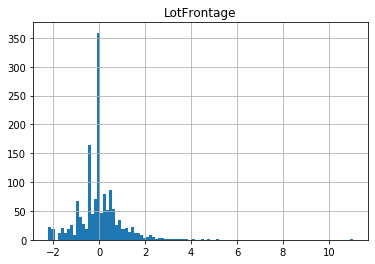

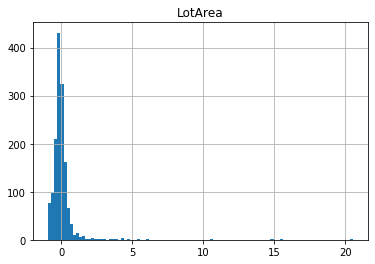

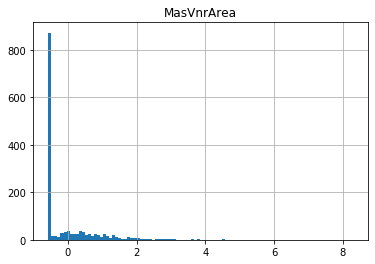

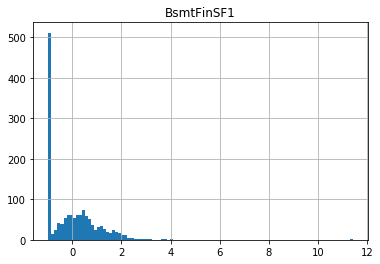

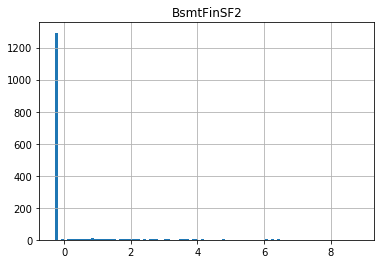

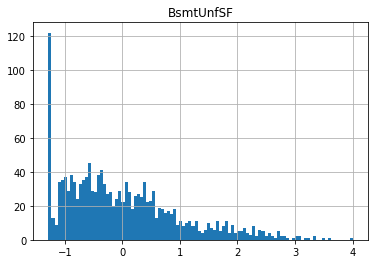

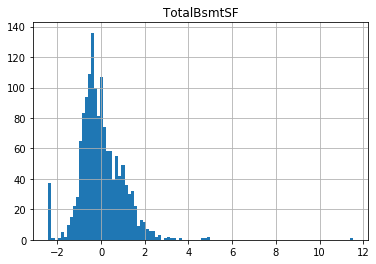

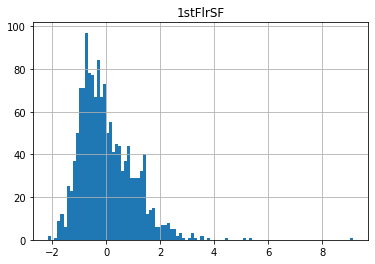

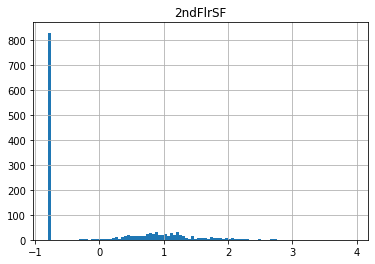

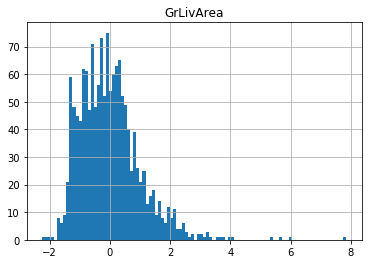

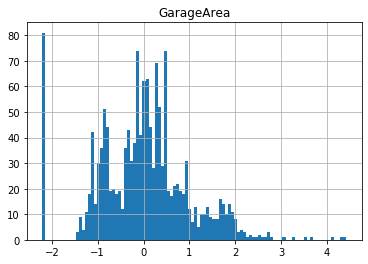

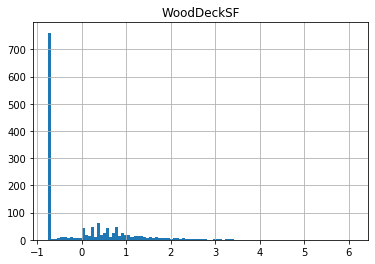

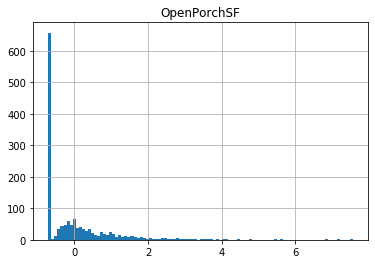

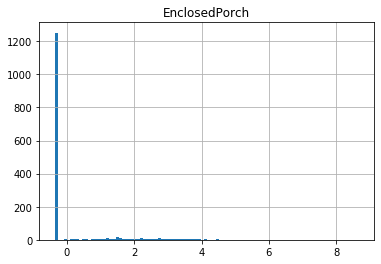

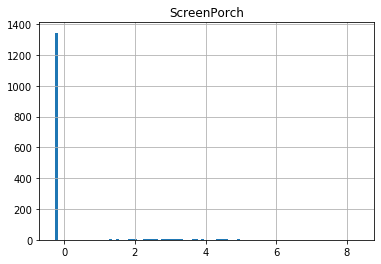

In [95]:
for features in continuous_var:
    data.hist(column=features,bins=100)
    plt.show()

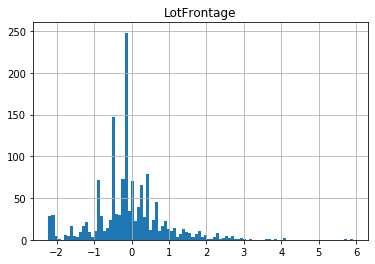

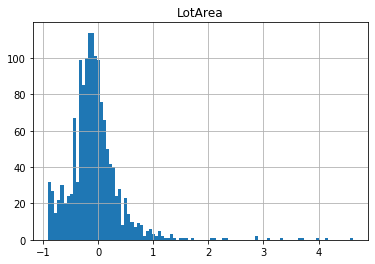

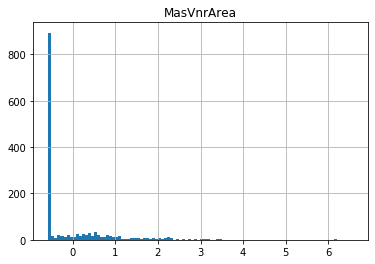

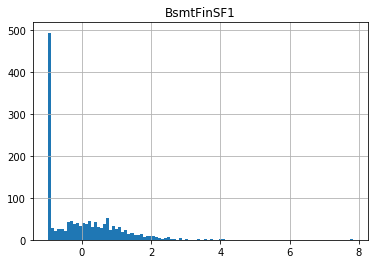

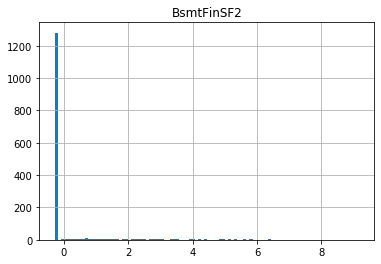

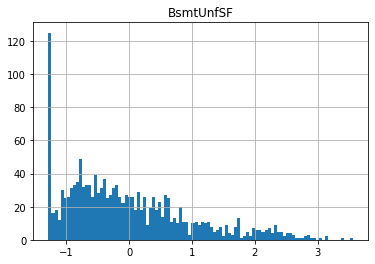

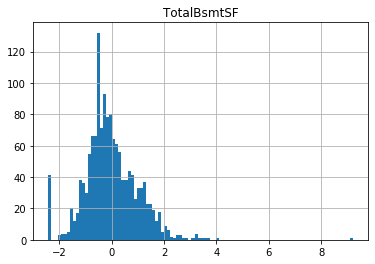

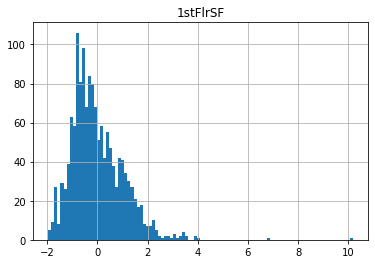

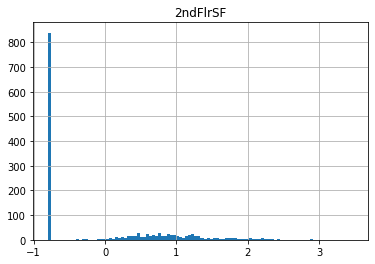

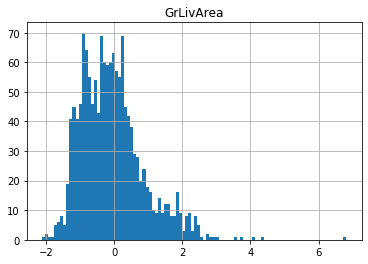

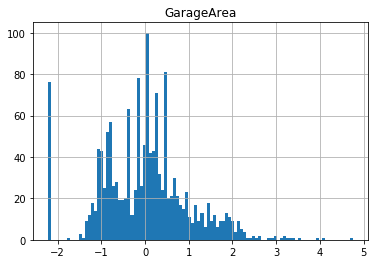

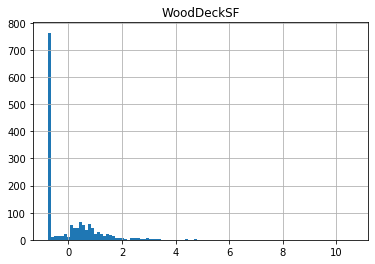

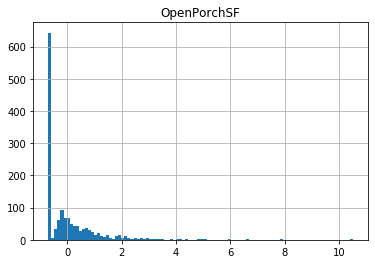

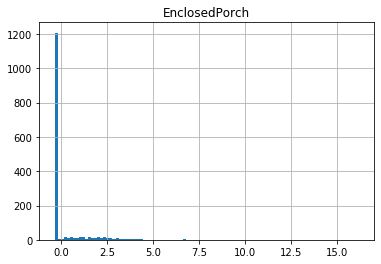

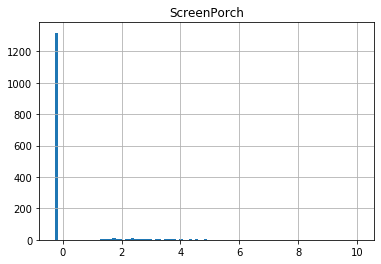

In [96]:
for features in continuous_var:
    data1.hist(column=features,bins=100)
    plt.show()

## ONE HOT ENCODING FOR CATEGORICAL VARIABLES

In [97]:
categorical_nominal_features=['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [98]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [99]:
data[categorical_nominal_features]=data[categorical_nominal_features].astype('category')
data1[categorical_nominal_features]=data1[categorical_nominal_features].astype('category')

In [100]:
full_data=pd.concat([data,data1],axis=0)
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
MSSubClass       2919 non-null int64
MSZoning         2919 non-null object
LotFrontage      2919 non-null float64
LotArea          2919 non-null float64
Street           2919 non-null object
Alley            2919 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null category
Utilities        2919 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null category
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2919 non-null object
Exterior2nd      2

In [101]:
full_data=pd.concat([full_data,pd.get_dummies(full_data[categorical_nominal_features],prefix=categorical_nominal_features)],axis=1)

In [102]:
full_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_

In [103]:
full_data.drop(categorical_nominal_features,axis=1,inplace=True)

In [104]:
full_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [105]:
new_train_data=full_data.iloc[:1460,]
new_train_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [106]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Columns: 302 entries, MSSubClass to SaleCondition_rareval
dtypes: float64(19), int64(17), uint8(266)
memory usage: 801.3 KB


In [107]:
new_test_data=full_data.iloc[1460:2919,]
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 302 entries, MSSubClass to SaleCondition_rareval
dtypes: float64(19), int64(17), uint8(266)
memory usage: 800.7 KB


In [110]:
new_test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [111]:
new_train_data1=pd.concat([new_train_data,train_data['SalePrice']],axis=1)

In [112]:
new_train_data1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [114]:
new_train_data1['SalePrice']=np.log(new_train_data1['SalePrice'])

In [115]:
new_train_data1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [116]:
new_test_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_Rare_val,MSZoning_rareval,Street_Pave,Street_Rare_val,Street_rareval,Alley_Grvl,Alley_Missing,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_Rare_val,LotShape_Reg,LotShape_rareval,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_Rare_val,Utilities_rareval,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Rare_val,LotConfig_rareval,LandSlope_Gtl,LandSlope_Mod,LandSlope_Rare_val,LandSlope_rareval,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Rare_val,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_rareval,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_Rare_val,Condition1_rareval,Condition2_Norm,Condition2_Rare_val,Condition2_rareval,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Rare_val,HouseStyle_SFoyer,HouseStyle_SLvl,HouseStyle_rareval,RoofStyle_Gable,RoofStyle_Hip,RoofStyle_Rare_val,RoofStyle_rareval,RoofMatl_CompShg,RoofMatl_Rare_val,RoofMatl_rareval,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Rare_val,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior1st_rareval,Exterior2nd_AsbShng,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Rare_val,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Exterior2nd_rareval,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Rare_val,MasVnrType_Stone,MasVnrType_missing,MasVnrType_rareval,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterQual_rareval,ExterCond_Fa,ExterCond_Gd,ExterCond_Rare_val,ExterCond_TA,ExterCond_rareval,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Rare_val,Foundation_Slab,Foundation_rareval,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Missing,BsmtQual_TA,BsmtQual_missing,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Missing,BsmtCond_Rare_val,BsmtCond_TA,BsmtCond_missing,BsmtCond_rareval,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Missing,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_missing,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Missing,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_missing,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Missing,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,BsmtFinType2_rareval,Heating_GasA,Heating_GasW,Heating_Rare_val,Heating_rareval,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Rare_val,HeatingQC_TA,HeatingQC_rareval,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_Rare_val,Electrical_SBrkr,Electrical_rareval,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Rare_val,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Rare_val,Functional_Typ,Functional_rareval,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Missing,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_missi

In [118]:
new_train_data1.to_csv(r'C:\Users\user\Desktop\pythonfiles\FINAL_TRAIN.csv',index=False)

In [119]:
new_test_data.to_csv(r'C:\Users\user\Desktop\pythonfiles\FINAL_TEST.csv',index=False)